In [547]:
%matplotlib inline
import matplotlib.pyplot as plt
import enigma
import pandas as pd
import numpy as np

public = enigma.Public()
public.set_auth(apikey='')

In [446]:
key='257f8bbf-ee4a-4763-a3bc-627a49e377f5'
snapshot = public.datasets.get(key).current_snapshot

In [598]:
## Make into DF
tableview = snapshot.get_rows(
    query_mode='advanced',
    query='(timeperiod:[1990 TO 2018])',
    row_limit=10000)
fields = [field.name for field in tableview.fields]
df_nearn_pc = pd.DataFrame(tableview, columns=fields)
df_nearn_pc.head()

,geofips,geoname,code,timeperiod,cl_unit,unit_mult,datavalue,noteref,note,serialid
0,00000,United States,PCNE_SI,1990,USD,0,13119,None,"NoteRef: ''. Note: Last updated: September 30,...",1803
1,00000,United States,PCNE_SI,1991,USD,0,13299,None,"NoteRef: ''. Note: Last updated: September 30,...",1804
2,00000,United States,PCNE_SI,1992,USD,0,14077,None,"NoteRef: ''. Note: Last updated: September 30,...",1805
3,00000,United States,PCNE_SI,1993,USD,0,14495,None,"NoteRef: ''. Note: Last updated: September 30,...",1806
4,00000,United States,PCNE_SI,1994,USD,0,15039,None,"NoteRef: ''. Note: Last updated: September 30,...",1807


In [599]:
df_nearn_pc.shape

(1500, 10)

In [600]:
drop_columns=['code','cl_unit','unit_mult','noteref','note','serialid']
df_nearn_pc.drop(drop_columns,axis=1,inplace=True)
df_nearn_pc.head()

,geofips,geoname,timeperiod,datavalue
0,00000,United States,1990,13119
1,00000,United States,1991,13299
2,00000,United States,1992,14077
3,00000,United States,1993,14495
4,00000,United States,1994,15039


In [601]:
State_rows=["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]


In [602]:
set1=set(df_nearn_pc['geoname'].unique().flatten())
set2=set(State_rows)
Not_States=list(set1.difference(set2))

In [603]:
Not_States

['Far West',
 'Mideast',
 'New England',
 'Plains',
 'Southwest',
 'District of Columbia',
 'United States',
 'Great Lakes',
 'Rocky Mountain',
 'Southeast']

In [604]:
for out in Not_States:
    df_nearn_pc.drop(df_nearn_pc.index[df_nearn_pc['geoname'].str.contains(out)],inplace=True)
df_nearn_pc.reset_index(drop=True,inplace=True)

In [605]:
print(df_nearn_pc.shape)
backup_df_nearn_pc=df_nearn_pc.copy()
df_nearn_pc.head()


(1250, 4)


,geofips,geoname,timeperiod,datavalue
0,01000,Alabama,1997,13905
1,01000,Alabama,1996,13371
2,01000,Alabama,1995,12900
3,01000,Alabama,1994,12500
4,01000,Alabama,1993,12001


In [606]:
timerange=np.arange(int(df_nearn_pc['timeperiod'].min()),int(df_nearn_pc['timeperiod'].max())+1)
print('Time Range =', df_nearn_pc['timeperiod'].min(), 'to', df_nearn_pc['timeperiod'].max(),' = ',
      int(df_nearn_pc['timeperiod'].max())+1-int(df_nearn_pc['timeperiod'].min()),'Years')
print(timerange, timerange.size)

Time Range = 1990 to 2014  =  25 Years
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014] 25


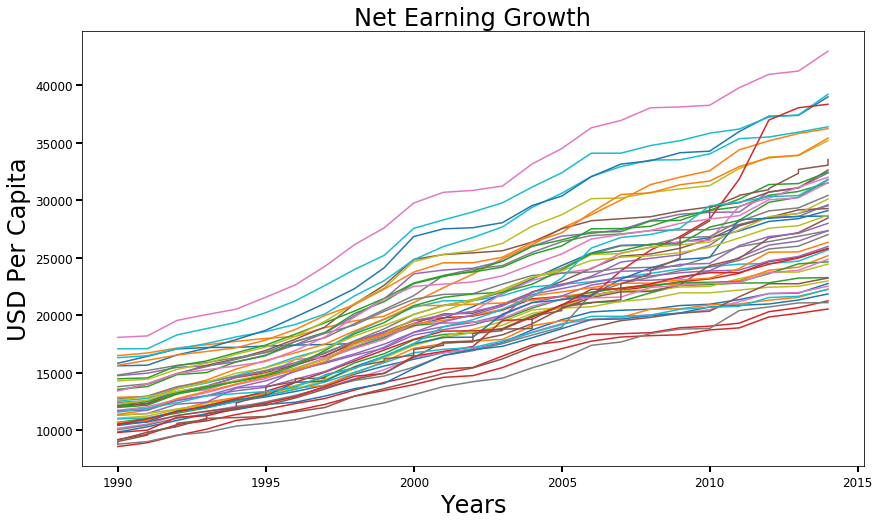

In [607]:
plt.rcParams['figure.figsize'] = (14,8)
fig, ax = plt.subplots();
useful_columns=['timeperiod','datavalue']
for State in State_rows:
    a=df_nearn_pc.iloc[df_nearn_pc.index[df_nearn_pc['geoname'].str.contains(State)]][useful_columns].astype(int)
    ax.plot(a['timeperiod'].sort_values(),a['datavalue'].sort_values(),label=State)
ax.set_title('Net Earning Growth',fontsize=24);
ax.set_xlabel('Years',fontsize=24);
ax.set_ylabel('USD Per Capita',fontsize=24);
ax.tick_params(labelsize=12, width=2, length=6, labeltop=False)

# legend = ax.legend(loc='best', fontsize='x-large')


# Get NCDC Data

In [51]:
keysource='c3c3393d-483d-4777-b290-9466be0bfc49' # To National Climate Data Center
NCDC_col = public.collections.get(keysource)

In [96]:
all_datasets=list(NCDC_col.child_datasets().all())

In [67]:
timerange_str= [str(timerange[i]) for i in range(len(timerange))]

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014']

In [258]:
datasets=[]
for i in range(len(timerange_str)):
    a=[s for s in all_datasets if timerange_str[i] in s.display_name]
    datasets.append(a)
datasets_flat = [item for sublist in datasets for item in sublist]

In [428]:
State_Codes = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [652]:
# ## Loaded from file instead of generating again
# features=['prcp','snow','tmin','tmax']
# state_dfs=[]
# year_state_ave_feat=np.zeros([len(datasets_flat),len(State_Codes),len(features)])
# cutoffs=[]
# no_load=[]
# for ds in datasets_flat:
#     key = ds.id
#     Year = ds.display_name[-4:]
#     snapshot = public.datasets.get(key).current_snapshot
#     for State in State_Codes:
#         query_str = '(country_code:US) AND ((hcnflag:HCN) OR (gsnflag:GSN)) AND (state_code:'+State+')'
#         try:
#             tableview_test = snapshot.get_rows(query_mode='advanced',
#                                        query=query_str,
#                                        row_limit=10000)
#         except:
#             no_load.append((Year, State,' was not loaded'))
#             print(Year, State,' was not loaded')
#             continue
#         if len(list(tableview_test))==10000:
#             cutoffs.append((Year, State,' was cut off'))
#             print(Year, State,' was cut off')
#         fields = [field.name for field in tableview_test.fields]
#         df=pd.DataFrame(tableview_test, columns=fields)
#         it=0
# #         print('Before features ', timerange_str.index(Year),State_Codes.index(State))
#         for f in features:
#             c=df.dropna(subset=[f])
#             days = c['date_'].unique()
#             feat_pday=[]
#             for day in days:
#                 feat_pday.append(c.loc[c['date_']==day,f].astype(np.float32).mean())
# #             print(timerange_str.index(Year),State_Codes.index(State),it,' = ',np.mean(np.array(feat_pday)))

#             year_state_ave_feat[timerange_str.index(Year),State_Codes.index(State),it]=np.mean(np.array(feat_pday))
#             it+=1


1990 CA  was cut off
1990 IL  was cut off
1990 IN  was cut off
1990 KS  was cut off
1990 MN  was cut off
1990 MS  was cut off
1990 MT  was cut off
1990 NE  was cut off
1990 NM  was cut off
1990 NY  was cut off
1990 NC  was cut off
1990 OK  was cut off
1990 OR  was not loaded
1990 SC  was cut off
1990 TX  was cut off
1990 UT  was cut off
1990 WA  was cut off
1990 WY  was cut off
1991 CA  was cut off
1991 IL  was cut off
1991 IN  was cut off
1991 KS  was cut off
1991 MN  was cut off
1991 MS  was cut off
1991 MT  was cut off
1991 NE  was cut off
1991 NM  was cut off
1991 NY  was cut off
1991 NC  was cut off
1991 OK  was cut off
1991 OR  was not loaded
1991 SC  was cut off
1991 TX  was cut off
1991 UT  was cut off
1991 WA  was cut off
1991 WY  was cut off
1992 CA  was cut off
1992 ID  was cut off
1992 IL  was cut off
1992 IN  was cut off
1992 KS  was cut off
1992 MN  was cut off
1992 MS  was cut off
1992 MT  was cut off
1992 NE  was cut off
1992 NM  was cut off
1992 NY  was cut off
1992 NC

C:\Users\Boo\AppData\Roaming\Python\Python36\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Boo\AppData\Roaming\Python\Python36\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


2001 OR  was not loaded
2002 CA  was cut off
2002 ID  was cut off
2002 IL  was cut off
2002 IN  was cut off
2002 KS  was cut off
2002 MN  was cut off
2002 MS  was cut off
2002 MT  was cut off
2002 NE  was cut off
2002 NM  was cut off
2002 NY  was cut off
2002 NC  was cut off
2002 OK  was cut off
2002 OR  was not loaded
2002 TX  was cut off
2002 UT  was cut off
2002 WA  was cut off
2002 WY  was cut off
2003 CA  was cut off
2003 ID  was cut off
2003 IL  was cut off
2003 IN  was cut off
2003 KS  was cut off
2003 MN  was cut off
2003 MS  was cut off
2003 MT  was cut off
2003 NE  was cut off
2003 NM  was cut off
2003 NY  was cut off
2003 NC  was cut off
2003 OK  was cut off
2003 OR  was not loaded
2003 TX  was cut off
2003 UT  was cut off
2003 WA  was cut off
2003 WY  was cut off
2004 CA  was cut off
2004 ID  was cut off
2004 IL  was cut off
2004 IN  was cut off
2004 KS  was cut off
2004 MN  was cut off
2004 MS  was cut off
2004 MT  was cut off
2004 NE  was cut off
2004 NM  was cut off
2004

In [ ]:
arr3='Year_State_Ave_Feature'
filename=arr3+'.npy'
year_state_ave_feat=np.load(filename)


In [678]:
arr1='Year_State_Ave_Feature_noloads'
np.save(arr1,np.array(no_load))
arr2='Year_State_Ave_Feature_cutoffs'
np.save(arr2,np.array(cutoffs))
arr3='Year_State_Ave_Feature1'
np.save(arr3,year_state_ave_feat)

In [654]:
results=year_state_ave_feat.copy()
backup=year_state_ave_feat.copy()

In [786]:
Years=np.repeat(timerange,year_state_ave_feat.shape[1])
States=np.tile(State_Codes,25)

In [787]:
print('Years size=',Years.size, 'States size =', States.size)

Years size= 1250 States size = 1250


In [788]:
Results=results.reshape(int(results.size/results.shape[2]),results.shape[2])
Results.shape

(1250, 4)

In [789]:
results_df = pd.DataFrame({'years':Years, 'states':States, '{}'.format(features[0]):Results[:,0],
                           '{}'.format(features[1]):Results[:,1], '{}'.format(features[2]):Results[:,2],
                           '{}'.format(features[3]):Results[:,3]})
results_df.head()

,years,states,prcp,snow,tmin,tmax
0,1990,AL,4.203148,0.000000,11.314280,25.245789
1,1990,AK,2.785880,7.425254,-4.425690,3.500738
2,1990,AZ,0.993227,1.406855,8.350603,24.944569
3,1990,AR,4.604384,0.240614,10.495452,22.725800
4,1990,CA,0.928335,0.574240,8.575448,23.455923


In [790]:
results_df.iloc[results_df.index[results_df['states'].str.contains(State_Codes[0])]].head()

,years,states,prcp,snow,tmin,tmax
0,1990,AL,4.203148,0.000000,11.314280,25.245789
50,1991,AL,4.311354,0.028845,11.685095,23.977663
100,1992,AL,4.076478,0.088037,10.383118,22.984146
150,1993,AL,3.524739,0.512451,10.510170,23.289845
200,1994,AL,4.260246,0.002374,11.242107,23.488525


In [791]:
actual_features={'prcp':'precip(mm)', 'snow':'snowfall(.1mm)','tmin':'tmin(c)', 'tmax':'tmax(c)'}
results_df.rename(index=str,columns=actual_features,inplace=True)
results_df.head()

,years,states,precip(mm),snowfall(.1mm),tmin(c),tmax(c)
0,1990,AL,4.203148,0.000000,11.314280,25.245789
1,1990,AK,2.785880,7.425254,-4.425690,3.500738
2,1990,AZ,0.993227,1.406855,8.350603,24.944569
3,1990,AR,4.604384,0.240614,10.495452,22.725800
4,1990,CA,0.928335,0.574240,8.575448,23.455923


In [792]:
State_converter_CtoN=dict(zip(State_Codes,State_rows))
State_converter_NtoC=dict(zip(State_rows,State_Codes))

In [793]:
## Prepare for Merge
results_nearn_pc=df_nearn_pc.copy()
actual_features={'timeperiod':'years','geoname':'states','datavalue':'netearn_pc'}
results_nearn_pc.rename(index=str,columns=actual_features,inplace=True)
results_nearn_pc['states']=results_nearn_pc['states'].map(State_converter_NtoC)
results_nearn_pc.head()

,geofips,states,years,netearn_pc
0,01000,AL,1997,13905
1,01000,AL,1996,13371
2,01000,AL,1995,12900
3,01000,AL,1994,12500
4,01000,AL,1993,12001


In [794]:
# results_df['years'].astype(str,inplace=True)
print(results_nearn_pc.dtypes)
print(results_df.dtypes)
# results_nearn_pc.head()

geofips       object
states        object
years         object
netearn_pc    object
dtype: object
years               int32
states             object
precip(mm)        float64
snowfall(.1mm)    float64
tmin(c)           float64
tmax(c)           float64
dtype: object


In [795]:
results_df['years']=results_df['years'].astype(str,inplace=True)
results_df.dtypes

years              object
states             object
precip(mm)        float64
snowfall(.1mm)    float64
tmin(c)           float64
tmax(c)           float64
dtype: object

In [796]:
print(results_df.shape,results_nearn_pc.shape)

(1250, 6) (1250, 4)


In [797]:
## Merge 
data_all=pd.merge(results_nearn_pc, results_df, on=['years','states'])
print(data_all.shape)
data_all.head()

(1250, 8)


,geofips,states,years,netearn_pc,precip(mm),snowfall(.1mm),tmin(c),tmax(c)
0,01000,AL,1997,13905,4.517859,0.070285,10.582745,23.240299
1,01000,AL,1996,13371,4.174249,0.119463,10.382427,23.253206
2,01000,AL,1995,12900,4.418046,0.049330,11.009173,23.742579
3,01000,AL,1994,12500,4.260246,0.002374,11.242107,23.488525
4,01000,AL,1993,12001,3.524739,0.512451,10.510170,23.289845


In [798]:
data_all['tdiff(c)']=data_all['tmax(c)'].sub(data_all['tmin(c)'])
data_all.head()

,geofips,states,years,netearn_pc,precip(mm),snowfall(.1mm),tmin(c),tmax(c),tdiff(c)
0,01000,AL,1997,13905,4.517859,0.070285,10.582745,23.240299,12.657555
1,01000,AL,1996,13371,4.174249,0.119463,10.382427,23.253206,12.870779
2,01000,AL,1995,12900,4.418046,0.049330,11.009173,23.742579,12.733405
3,01000,AL,1994,12500,4.260246,0.002374,11.242107,23.488525,12.246418
4,01000,AL,1993,12001,3.524739,0.512451,10.510170,23.289845,12.779675


In [799]:
backup_data_all=data_all.copy()
arr4='Data_All_pickle1.pkl'
data_all.to_pickle(arr4)
arr5='Data_All_NP1'
np.save(arr5,data_all.values)

In [990]:
data_all.head()

,geofips,states,years,netearn_pc,precip(mm),snowfall(.1mm),tmin(c),tmax(c),tdiff(c)
0,01000,AL,1997,13905,4.517859,0.070285,10.582745,23.240299,12.657555
1,01000,AL,1996,13371,4.174249,0.119463,10.382427,23.253206,12.870779
2,01000,AL,1995,12900,4.418046,0.049330,11.009173,23.742579,12.733405
3,01000,AL,1994,12500,4.260246,0.002374,11.242107,23.488525,12.246418
4,01000,AL,1993,12001,3.524739,0.512451,10.510170,23.289845,12.779675


In [993]:
## Get useful data for model
old_columns=data_all.columns
wanted=[1,2,3,4,5,8]
model_col=[old_columns[wanted]]
model_col=model_col[0]
mdf=data_all[model_col].copy()
print(mdf.dtypes)
print('Before = ',mdf['states'].size)
## Drop Oregon
'''Oregon did not have data so throwing it out'''
mdf.drop(mdf.index[mdf['states'].str.contains('OR')],inplace=True)
mdf.reset_index(drop=True,inplace=True)
print('After Oregon = ',mdf['states'].size)
## Drop anything with tdiff(c)==0 or precip==0
'''Some years did not have accurate data'''
mdf.drop(mdf.index[mdf['tdiff(c)']==0],inplace=True)
print('After tdfiff = ',mdf['states'].size)
mdf.drop(mdf.index[mdf['precip(mm)']==0],inplace=True)
print('After precip = ',mdf['states'].size)
mdf.reset_index(drop=True,inplace=True)

print('After All= ',mdf['states'].size)
mdf.head()

states             object
years              object
netearn_pc         object
precip(mm)        float64
snowfall(.1mm)    float64
tdiff(c)          float64
dtype: object
Before =  1250
After Oregon =  1225
After tdfiff =  1224
After precip =  1224
After All=  1224


,states,years,netearn_pc,precip(mm),snowfall(.1mm),tdiff(c)
0,AL,1997,13905,4.517859,0.070285,12.657555
1,AL,1996,13371,4.174249,0.119463,12.870779
2,AL,1995,12900,4.418046,0.049330,12.733405
3,AL,1994,12500,4.260246,0.002374,12.246418
4,AL,1993,12001,3.524739,0.512451,12.779675


In [995]:
mdf['netearn_pc']=mdf['netearn_pc'].astype(int)
mdf.dtypes

states             object
years              object
netearn_pc          int32
precip(mm)        float64
snowfall(.1mm)    float64
tdiff(c)          float64
dtype: object

In [996]:
new_columns=mdf.columns
feat_columns=new_columns[2:]
feat_fits=[]
for f in feat_columns:
    a=f+'_slope'
    b=f+'_inter'
    feat_fits.append(a)
    feat_fits.append(b)
print(feat_fits)

['netearn_pc_slope', 'netearn_pc_inter', 'precip(mm)_slope', 'precip(mm)_inter', 'snowfall(.1mm)_slope', 'snowfall(.1mm)_inter', 'tdiff(c)_slope', 'tdiff(c)_inter']


In [998]:
State_Codes=np.array(State_Codes)
State_Codes_wo_OR=State_Codes[State_Codes!='OR'].tolist()

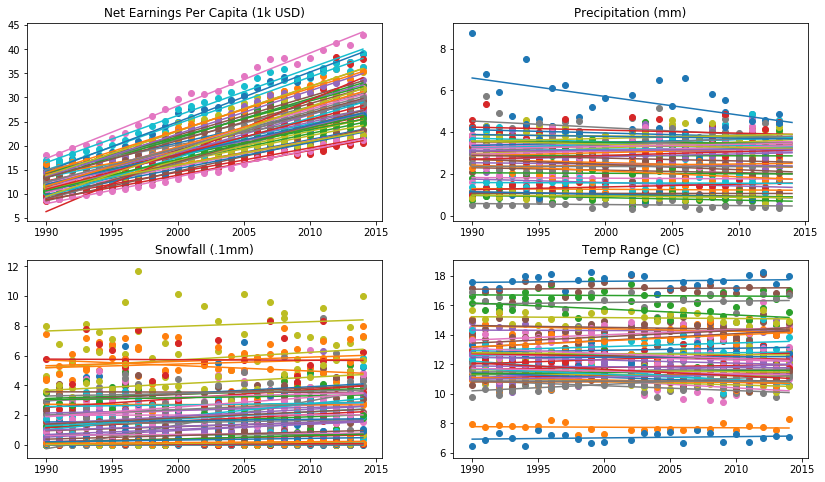

In [1291]:
from sklearn import linear_model
linfit_data_all=pd.DataFrame({'states':State_Codes_wo_OR})
fit_mat=np.empty([len(State_Codes_wo_OR),2*len(feat_columns)])
fit_mat[:]=np.nan
# row and column sharing
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.set_title('Net Earnings Per Capita (1k USD)')
ax2.set_title('Precipitation (mm)')
ax3.set_title('Snowfall (.1mm)')
ax4.set_title('Temp Range (C)')
for State in State_Codes_wo_OR:
    fits=[]
    it_df=mdf.iloc[mdf.index[mdf['states'].str.contains(State)]]
    
    for f in range(len(feat_columns)):
        test_col=['years',feat_columns[f]]
        model_df=it_df[test_col].dropna().astype(np.float64).sort_values(by='years')
        X=model_df[test_col[0]].values.reshape(-1,1)
        y=model_df[test_col[1]].values.reshape(-1,1)
#         ax.plot(X,y)
        lm = linear_model.LinearRegression()
        model = lm.fit(X,y)
        if f==1:
            model= lm.fit(X[:-1],y[:-1])
        y_fit=lm.coef_[0][0]*X+lm.intercept_[0]
        lab=(State,feat_columns[f])
#         print(f)
        if f==0:
            ax1.scatter(X,y/1000)
            ax1.plot(X,y_fit/1000,label=lab)
        if f==1:
            ax2.scatter(X[:-1],y[:-1])
            ax2.plot(X,y_fit,label=lab)
        if f==2:
            ax3.scatter(X,y)
            ax3.plot(X,y_fit,label=lab)
        if f==3:
            ax4.scatter(X,y)
            ax4.plot(X,y_fit,label=lab)
            
        fits.append(lm.coef_[0][0])
        fits.append(lm.intercept_[0])
#         fits.append(lm.score(X,y))
    fit_mat[State_Codes_wo_OR.index(State),:]=np.array(fits)



#         if lm.score(X,y)<.5:
#             badfit.append((State,feat_columns[f]))
#             print((State,lm.score(X,y)))

legend = ax.legend(loc='best', fontsize='x-large')

In [1293]:
save_loc='DI_Features_Fit'
fig.savefig(save_loc,dpi=600)

In [1173]:
for feat in feat_fits:
    linfit_data_all[feat]=fit_mat[:,feat_fits.index(feat)]

In [1174]:
linfit_data_all.head()

,states,netearn_pc_slope,netearn_pc_inter,precip(mm)_slope,precip(mm)_inter,snowfall(.1mm)_slope,snowfall(.1mm)_inter,tdiff(c)_slope,tdiff(c)_inter
0,AL,530.840000,-1045733.12,-0.015858,35.674979,0.007758,-15.414541,0.014250,-15.557830
1,AK,925.543077,-1828056.24,-0.015581,33.703489,-0.037187,79.712306,-0.003765,15.258758
2,AZ,573.561538,-1130358.12,-0.011873,24.609217,0.001052,-1.424101,-0.004060,24.782875
3,AR,501.209231,-987907.12,-0.004151,11.801058,0.018992,-37.583268,0.012777,-13.770207
4,CA,772.219231,-1522642.94,-0.016477,34.542152,0.044189,-87.412988,-0.002478,19.243329


In [1175]:
## Define a metric for best living and use model to determine best place to live 
from sklearn import preprocessing
def get_metric(X,weights,skip=1,inplace=True):
    tdf=X.copy()
    Y=X.copy()
    col=tdf.columns[skip:]
    scales_mm=[]
    for feat in col:
        min_max_scaler = preprocessing.MinMaxScaler()

        a=tdf[feat].astype(np.float64).values.reshape(-1,1)
        tdf[feat]=min_max_scaler.fit_transform(a)
        scales_mm.append(min_max_scaler.scale_)  
    min_max_scaler1 = preprocessing.MinMaxScaler()
    if inplace==True:
        met=(weights[0]*tdf[col[0]]).sub((tdf[col[1]]*weights[1])).sub((weights[2]*tdf[col[2]])).sub((weights[-1]*tdf[col[-1]]))
        Y['metric']=min_max_scaler1.fit_transform(met.astype(np.float64).values.reshape(-1,1))
        return Y
    
    met=(weights[0]*tdf[col[0]]).sub((tdf[col[1]]*weights[1])).sub((weights[2]*tdf[col[2]])).sub((weights[-1]*tdf[col[-1]]))
    Y['metric']=min_max_scaler1.fit_transform(met.astype(np.float64).values.reshape(-1,1))
    return Y['metric']

In [1184]:
## Build function to find best place to live based on metric defined above using fit data
def mod_values(year,weights,inplace=True):
    
    df=linfit_data_all.copy()
    Year=year
    columns=df.columns[1:]
    a=pd.DataFrame({'states':State_Codes_wo_OR})
    for t in range(len(columns)):
        if t%2==1:
            continue
        num=int(t/2)
        a[features[num]]=df[columns[t]].multiply(year).add(df[columns[int(t+1)]]).copy()
   
    if inplace==True:
        b=get_metric(a,weights)
        return b
    b=get_metric(a,weights,inplace=False)
    return b

In [1221]:
def best_states(year, weights, num=5,show_values=True,show_all=False, show_orig=False):
    model_values=mod_values(year,weights)

    top=model_values.nlargest(num,['metric'],keep='all')
    if show_orig==True:
        mdf_year=mdf[mdf['years'].str.contains(str(year))].copy()
        mdf_year_orig=name_change_pre(mdf_year,'orig_',skip=2)
        output=pd.merge(top, mdf_year_orig, on=['states'])
        return output
    if show_all == True:
        return top
    
    if show_values==False:
        return top['states']
    cols=['states','metric']
    return top[cols]
    

In [1208]:
def name_change_pre(df,string,skip=0):
    c=df.columns[skip:]
    changed=[]
    for col in c:
        name=string+col
        changed.append(name)
    renamed=dict(zip(c,changed))
    b=df.rename(index=str,columns=renamed).copy()
    return b

In [1229]:
weights=[1,1,1,1]
test=best_states(1990,weights,49,show_orig=True)
test.head()

,states,netearn_pc,precip(mm),snowfall(.1mm),tdiff(c),metric,years,orig_netearn_pc,orig_precip(mm),orig_snowfall(.1mm),orig_tdiff(c)
0,DE,14474.249231,3.271291,-0.264924,10.874239,1.000000,1990,14802,3.238822,0.388128,11.133316
1,NJ,16464.427692,3.217533,1.277317,11.695414,0.930447,1990,17078,3.637973,1.073512,11.728864
2,CT,17324.760000,3.412338,1.926673,11.393486,0.923778,1990,18077,3.758630,1.325342,11.157396
3,IL,14352.944615,2.891109,1.203728,11.279193,0.855461,1990,14475,3.575823,1.276206,11.573668
4,NV,15011.150769,0.583214,1.363574,16.087392,0.831117,1990,13785,0.506305,1.732560,16.880656


In [1248]:
def get_perdiff(year,weights,num=49):
    plot_df=best_states(year,weights,49,show_orig=True)
    col=plot_df.columns
    for f in np.arange(1,5):
        name_diff='perdiff_'+col[f]
        ind=f+6
        plot_df[name_diff]=plot_df[col[f]].sub(plot_df[col[ind]]).divide(plot_df[col[ind]]).multiply(100)
    return plot_df

In [1260]:
plot_df=get_perdiff(1990,weights)
col=plot_df.columns
plot_df.head()

,states,netearn_pc,precip(mm),snowfall(.1mm),tdiff(c),metric,years,orig_netearn_pc,orig_precip(mm),orig_snowfall(.1mm),orig_tdiff(c),perdiff_netearn_pc,perdiff_precip(mm),perdiff_snowfall(.1mm),perdiff_tdiff(c)
0,DE,14474.249231,3.271291,-0.264924,10.874239,1.000000,1990,14802,3.238822,0.388128,11.133316,-2.214233,1.002491,-168.256879,-2.327039
1,NJ,16464.427692,3.217533,1.277317,11.695414,0.930447,1990,17078,3.637973,1.073512,11.728864,-3.592764,-11.556983,18.984886,-0.285192
2,CT,17324.760000,3.412338,1.926673,11.393486,0.923778,1990,18077,3.758630,1.325342,11.157396,-4.161310,-9.213251,45.371724,2.115995
3,IL,14352.944615,2.891109,1.203728,11.279193,0.855461,1990,14475,3.575823,1.276206,11.573668,-0.843215,-19.148431,-5.679200,-2.544351
4,NV,15011.150769,0.583214,1.363574,16.087392,0.831117,1990,13785,0.506305,1.732560,16.880656,8.894819,15.190065,-21.297113,-4.699249


In [1281]:
'''Does not work in function'''
# def plot_states(year,weights,num=49):
#     Title='State Quality in Year - ' + str(year)
#     plot_df=get_perdiff(year,weights)
#     col=plot_df.columns

#     plot_df['text'] = plot_df['states'] + 'Feature: (Model, Orig, %Diff)'+'<br>' +\
#         'Net Earning Per Capita: ('+plot_df[col[1]].round().astype(str)+', '+plot_df[col[7]].round().astype(str)+\
#         ', '+ plot_df[col[11]].round().astype(str)+') <br>'+\
#         'Precipitation (mm): ('+plot_df[col[2]].round(2).astype(str)+', '+plot_df[col[8]].round(2).astype(str)+\
#         ', '+ plot_df[col[12]].round().astype(str)+') <br>'+\
#         'Snowfall (.1mm): ('+plot_df[col[3]].round(2).astype(str)+', '+plot_df[col[9]].round(2).astype(str)+\
#         ', '+ plot_df[col[13]].round().astype(str)+') <br>'+\
#         'Temperature Range (C): ('+plot_df[col[4]].round().astype(str)+', '+plot_df[col[10]].round().astype(str)+\
#         ', '+ plot_df[col[14]].round().astype(str)+')'


#     data = [ dict(
#             type='choropleth',

#             autocolorscale = True,
#             locations = plot_df['states'],
#             z = plot_df['metric'].astype(float),
#             locationmode = 'USA-states',
#             text=plot_df['text'],
#             colorbar = dict(
#                 title = "")
#             ) ]

#     layout = dict(
#             title = Title,
#             geo = dict(
#                 scope='usa',
#                 projection=dict( type='albers usa' ),
#                 showlakes = True,
#                 lakecolor = 'rgb(255, 255, 255)'),
#                  )

#     fig = dict( data=data, layout=layout )
#     return (py.iplot( fig, filename='Test-cloropleth-map' ))

In [1286]:
from plotly import tools
import plotly.plotly as py
tools.set_credentials_file(username='kbschliep', api_key='Q3ebjCgA8aGcaPchZl4H')

year=2020
Title='State Quality in Year - ' + str(year)


plot_df['text'] = plot_df['states'] + '<br>'+'Feature: (Model, Orig, %Diff)'+'<br>' +\
    'Net Earning Per Capita: ('+plot_df[col[1]].round().astype(str)+', '+plot_df[col[7]].round().astype(str)+\
    ', '+ plot_df[col[11]].round().astype(str)+') <br>'+\
    'Precipitation (mm): ('+plot_df[col[2]].round(2).astype(str)+', '+plot_df[col[8]].round(2).astype(str)+\
    ', '+ plot_df[col[12]].round().astype(str)+') <br>'+\
    'Snowfall (.1mm): ('+plot_df[col[3]].round(2).astype(str)+', '+plot_df[col[9]].round(2).astype(str)+\
    ', '+ plot_df[col[13]].round().astype(str)+') <br>'+\
    'Temperature Range (C): ('+plot_df[col[4]].round().astype(str)+', '+plot_df[col[10]].round().astype(str)+\
    ', '+ plot_df[col[14]].round().astype(str)+')'
 
                  
data = [ dict(
        type='choropleth',
        
        autocolorscale = True,
        locations = plot_df['states'],
        z = plot_df['metric'].astype(float),
        locationmode = 'USA-states',
        text=plot_df['text'],
        colorbar = dict(
            title = "")
        ) ]

layout = dict(
        title = Title,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='State Quality -DI -2019' )

In [862]:
data = []
layout = dict(
    title = 'Rate of Change',
    # showlegend = False,
    autosize = False,
    width = 1000,
    height = 900,
    hovermode = False,
    legend = dict(
        x=0.7,
        y=-0.1,
        bgcolor="rgba(255, 255, 255, 0)",
        font = dict( size=11 ),
    )
)
years = plot_columns[1:]

for i in range(len(years)):
    key = 'plot'+str(i+1)
    # Data
    data.append(
        dict(
            type='choropleth',
            autocolorscale = True,
            locations = pdf['state'],
            z = pdf['netearn_pc_slope'].astype(float),
            locationmode = 'USA-states',
            
            colorbar = dict(
                title = "Rate of Change")
        ))
    layout[key] = dict(
            title = 'Rate of Change of Net Earning Per Capita 1990-2014',
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
#                 domain = dict( x = [], y = [] ),
                 )

# z = 0
# COLS = 2
# ROWS = 2
# for y in reversed(range(ROWS)):
#     for x in range(COLS):
#         key = 'plot'+str(z+1)
#         layout[key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
#         layout[key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
#         z=z+1
#         if z > 5:
#             break

fig = { 'data':data, 'layout':layout }
py.iplot( fig, filename='Test_subplots', height=900, width=1000 )

ValueError: Invalid properties specified for object of type plotly.graph_objs.Layout: ('plot1', 'plot2', 'plot3', 'plot4')

    Valid properties:
        angularaxis
            plotly.graph_objs.layout.AngularAxis instance or dict
            with compatible properties
        annotations
            plotly.graph_objs.layout.Annotation instance or dict
            with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        colorscale
            plotly.graph_objs.layout.Colorscale instance or dict
            with compatible properties
        colorway
            Sets the default trace colors.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        direction
            Legacy polar charts are deprecated! Please switch to
            "polar" subplots. Sets the direction corresponding to
            positive angles in legacy polar charts.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        geo
            plotly.graph_objs.layout.Geo instance or dict with
            compatible properties
        grid
            plotly.graph_objs.layout.Grid instance or dict with
            compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels

        hiddenlabelssrc
            Sets the source reference on plot.ly for  hiddenlabels
            .
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the plotly
            service (at https://plot.ly or on-premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            plotly.graph_objs.layout.Hoverlabel instance or dict
            with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            `clickmode` includes the "select" flag, `hovermode`
            defaults to "closest". If `clickmode` lacks the
            "select" flag, it defaults to "x" or "y" (depending on
            the trace's `orientation` value) for plots based on
            cartesian coordinates. For anything else the default
            value is "closest".
        images
            plotly.graph_objs.layout.Image instance or dict with
            compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            plotly.graph_objs.layout.Legend instance or dict with
            compatible properties
        mapbox
            plotly.graph_objs.layout.Mapbox instance or dict with
            compatible properties
        margin
            plotly.graph_objs.layout.Margin instance or dict with
            compatible properties
        modebar
            plotly.graph_objs.layout.Modebar instance or dict with
            compatible properties
        orientation
            Legacy polar charts are deprecated! Please switch to
            "polar" subplots. Rotates the entire polar by the given
            angle in legacy polar charts.
        paper_bgcolor
            Sets the color of paper where the graph is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the color of plotting area in-between x and y
            axes.
        polar
            plotly.graph_objs.layout.Polar instance or dict with
            compatible properties
        radialaxis
            plotly.graph_objs.layout.RadialAxis instance or dict
            with compatible properties
        scene
            plotly.graph_objs.layout.Scene instance or dict with
            compatible properties
        selectdirection
            When "dragmode" is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            plotly.graph_objs.layout.Shape instance or dict with
            compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            plotly.graph_objs.layout.Slider instance or dict with
            compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            plotly.graph_objs.layout.Ternary instance or dict with
            compatible properties
        title
            plotly.graph_objs.layout.Title instance or dict with
            compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        updatemenus
            plotly.graph_objs.layout.Updatemenu instance or dict
            with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins.
        width
            Sets the plot's width (in px).
        xaxis
            plotly.graph_objs.layout.XAxis instance or dict with
            compatible properties
        yaxis
            plotly.graph_objs.layout.YAxis instance or dict with
            compatible properties
        

In [133]:
## Query is odd ,mode='advanced',query='(country_code:US)',row_limit=10000
key_test = datasets_flat[0].id
snapshot_test = public.datasets.get(key_test).current_snapshot
tableview_test = snapshot_test.get_rows(query_mode='advanced',
                                   query='(country_code:US) AND (hcnflag:HCN) AND (state_code:AZ)',
                                   row_limit=10000)
fields = [field.name for field in tableview_test.fields]
df_test = pd.DataFrame(tableview_test, columns=fields)
df_test.head()

,station_id,longitude,latitude,elevation,position_name,gsnflag,hcnflag,city,state,state_code,...,country_code,date_,prcp,snow,snwd,tmax,tmin,awnd,serialid,latitude_longitude_appended
0,USC00023160,35.2681,-111.7428,2239.4,FT VALLEY,None,HCN,Flagstaff,Arizona,AZ,...,US,1990-02-01T00:00:00,None,152,None,0,-12.8,None,1916138,None
1,USC00024849,36.8644,-111.6022,978.4,LEES FERRY,None,HCN,Page,Arizona,AZ,...,US,1990-03-25T00:00:00,None,None,None,27.2,9.4,None,1918815,None
2,USC00024849,36.8644,-111.6022,978.4,LEES FERRY,None,HCN,Page,Arizona,AZ,...,US,1990-03-26T00:00:00,None,None,None,28.3,6.7,None,1919390,None
3,USC00024849,36.8644,-111.6022,978.4,LEES FERRY,None,HCN,Page,Arizona,AZ,...,US,1990-03-28T00:00:00,None,None,None,28.3,12.8,None,1919478,None
4,USC00024849,36.8644,-111.6022,978.4,LEES FERRY,None,HCN,Page,Arizona,AZ,...,US,1990-03-30T00:00:00,None,None,None,17.2,5.6,None,1921035,None


In [201]:
c=df_test.dropna(subset=['prcp'])
c['prcp'].astype(np.float32).sum()/c.groupby('city').count()['station_id'].size/c.groupby('date_').count()['station_id'].size

0.9445698844178082

In [234]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

df['text'] = df['state'] + '<br>' +\
    'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
    'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
    'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

0       None
12         0
157        0
371      4.8
781        0
994        0
1459       0
1635     1.3
1781       0
2018       0
2817     0.8
3600     2.8
3914     7.4
4986     1.3
5059     9.4
5344       0
5564     5.1
6523     0.8
6828     2.5
6994       2
7672       0
7838       0
8085       0
8160       0
Name: prcp, dtype: object

In [235]:
days = df_test['date_'].unique()
rpd=[]
for day in days:
    rpd.append(df_test.loc[df_test['date_']==day,'prcp'].astype(np.float32).mean())

In [142]:
'(country_code:US) AND (hcnflag:HCN) AND (state_code:'+State_Codes[0]+') '

'(country_code:US) AND (hcnflag:HCN) AND (state_code:AL) '